This notebook illustrate the results from the latent feature analysis of the 200 blood cancer samples from Dietrich et al 2018 J Clin Invest.

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
analysis

AnnData object with n_obs × n_vars = 200 × 9558
    obs: 'idx', 'louvain'
    var: 'view'
    uns: 'louvain', 'neighbors', 'umap', 'view'
    obsm: 'X_umap', 'scmaui-ensemble'
    obsp: 'connectivities', 'distances'

Below are the results from the runs with and without accounting for covariates.
In this example, the covariate (Gender) does not seem to lead to significant batch effects
that is why accounting for the covariates via a conditional encoder or an adversarial training strategy
leads to similar results.

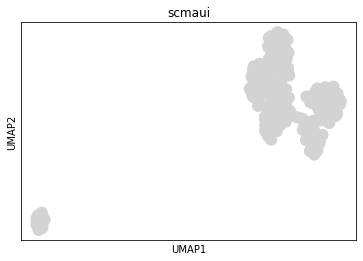

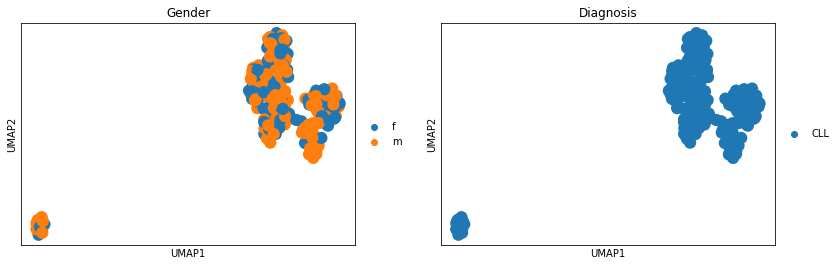

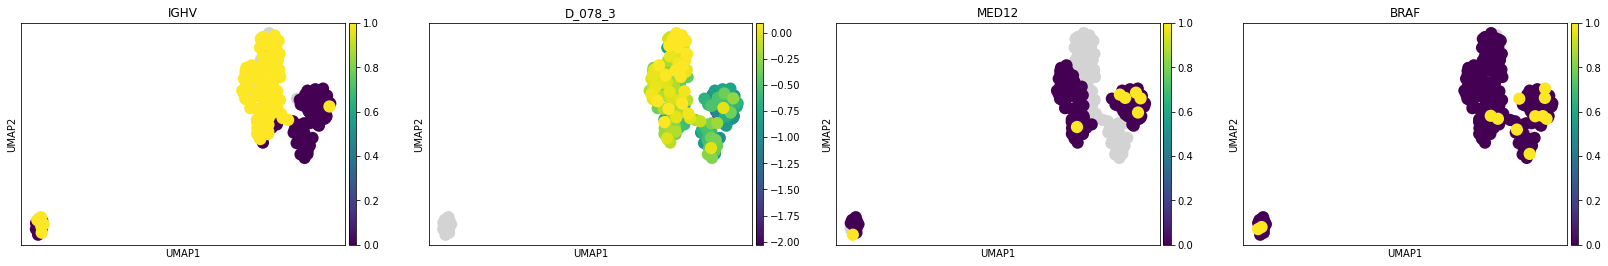

In [7]:
# results without batch correction
analysis = sc.read_h5ad('scmaui_cll_model/analysis.h5ad')
sc.pl.umap(analysis, title="scmaui")
sc.pl.umap(analysis, color=['Gender', 'Diagnosis'])
sc.pl.umap(analysis, color=['IGHV', 'D_078_3', 'MED12', 'BRAF'])

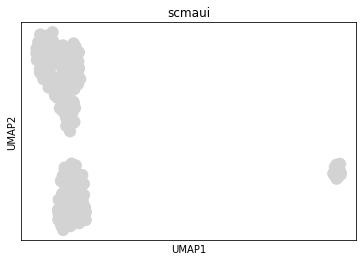

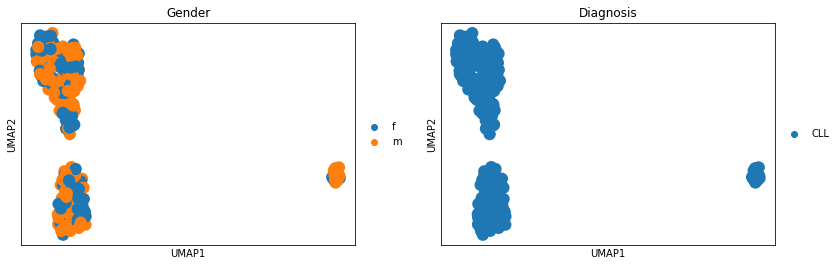

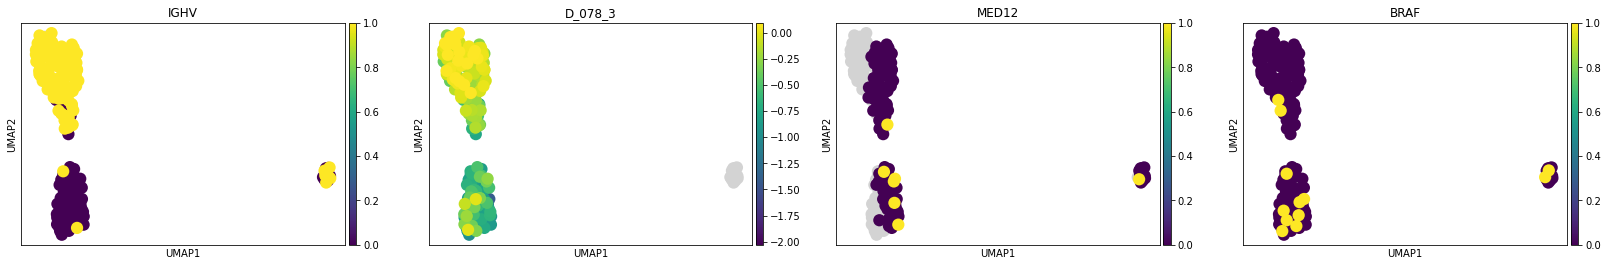

In [12]:
# results from the conditional encoder
analysis = sc.read_h5ad('scmaui_cll_cond_model/analysis.h5ad')
sc.pl.umap(analysis, title="scmaui")
sc.pl.umap(analysis, color=['Gender', 'Diagnosis'])
sc.pl.umap(analysis, color=['IGHV', 'D_078_3', 'MED12', 'BRAF'])

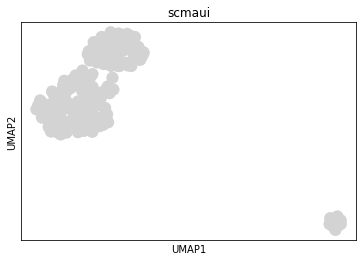

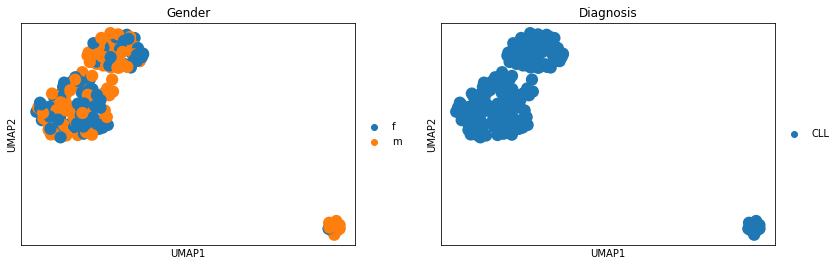

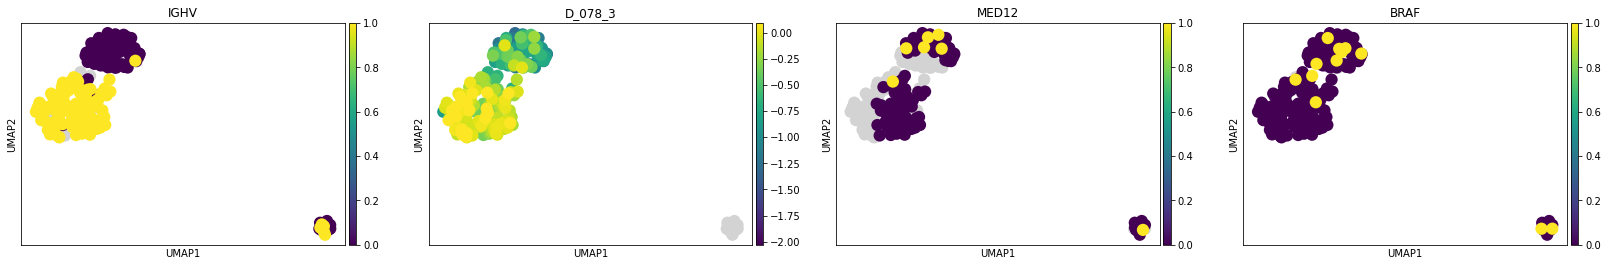

In [13]:
# results from adverarial training against Gender
analysis = sc.read_h5ad('scmaui_cll_adv_model/analysis.h5ad')
sc.pl.umap(analysis, title="scmaui")
sc.pl.umap(analysis, color=['Gender', 'Diagnosis'])
sc.pl.umap(analysis, color=['IGHV', 'D_078_3', 'MED12', 'BRAF'])


For comparison, below we illustrate the UMAP based on the latent features derived from MOFA

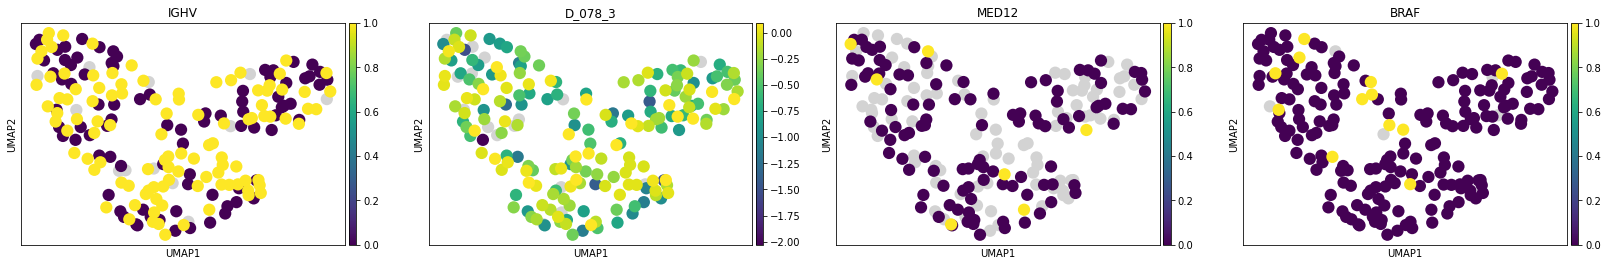

In [10]:
# to run this cell, first run 00a_run_mofa.R
mofa = pd.read_csv("mofa_latent_features.csv")
analysis.obsm['mofa'] = mofa.values
sc.pp.neighbors(analysis, use_rep='mofa')
sc.tl.umap(analysis)
sc.pl.umap(analysis, color=['IGHV', 'D_078_3', 'MED12', 'BRAF'])